In [26]:
%load_ext autoreload 
%autoreload 2
from simple_hsmm import *
import matplotlib.pyplot as plt
%matplotlib inline


q_matrix: {1: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 1, 0.3333333333333333, 0.3333333333333333], 2: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0, 0.3333333333333333, 0.3333333333333333], 3: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0, 0.3333333333333333, 0.3333333333333333]}
forward probabilities: [{1: 1.0, 2: 0.0, 3: 0.0}, {1: 0.0, 2: 0.0, 3: 0.0}, {1: 0.0, 2: 1.0, 3: 0.0}, {1: 0.0, 2: 0.0, 3: 0.0}, {1: 0.0, 2: 0.0, 3: 0.0}, {1: 0.0, 2: 0.0, 3: 0.0}]
backward probabilities: [{1: 0.0, 2: 0.0, 3: 0.0}, {1: 0.0, 2: 0.0, 3: 0.0}, {1: 0.0, 2: 0.0, 3: 0.0}, {1: 1.0, 2: 0.0, 3: 0.0}, {1: 0.0, 2: 0.0, 3: 1.0}, {1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.3333333333333333}]
forward backward result: [{1: 0.0, 2: 0.0, 3: 0.0}, {1: 0.0, 2: 0.0, 3: 0.0}, {1: 0.0, 2: 0.0, 3: 0.0}, {1: 0.0, 2: 0.0, 3: 0.0}, {1: 0.0, 2: 0.0, 3: 0.0}, {1: 0.0, 2: 0.0, 3: 0.0}]
The autoreload extension is already loaded. To reload it, use:
  %reload_ext 

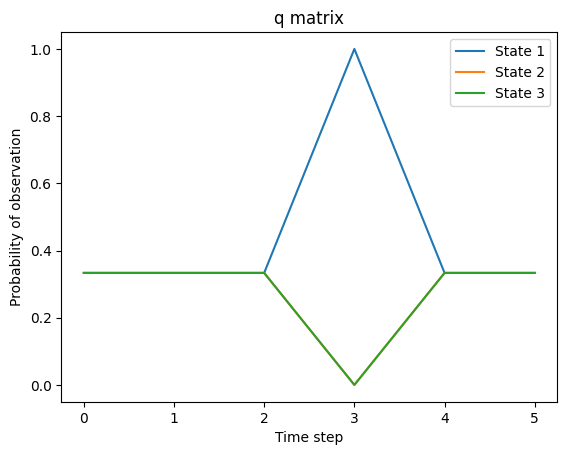

In [22]:
q = q_matrix(obs, Observation)

# plot each state as a different line on the same plot
for state in states:
    plt.plot(range(len(obs)), q[state], label=f"State {state}")

plt.xlabel('Time step')
plt.ylabel('Probability of observation')
plt.title('q matrix')
plt.legend()
plt.show()

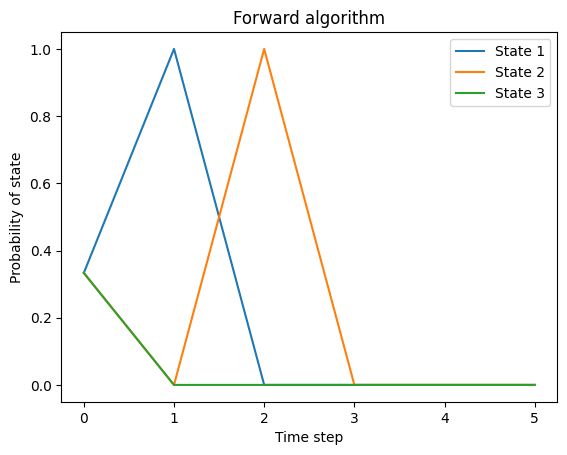

In [23]:
forward = forward(states, Transition, obs, q, Duration)

# plot each state
for state in states:
    plt.plot(range(len(obs)), [forward[t][state] for t in range(len(obs))], label=f"State {state}")

# label
plt.xlabel('Time step')
plt.ylabel('Probability of state')
plt.title('Forward algorithm')
plt.legend()
plt.show()

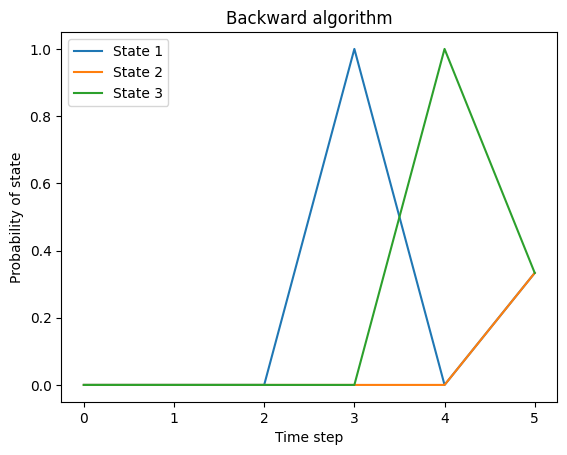

In [24]:
backward = backward(states, Transition, obs, q, Duration)

# plot each state
for state in states:
    plt.plot(range(len(obs)), [backward[t][state] for t in range(len(obs))], label=f"State {state}")

# label
plt.xlabel('Time step')
plt.ylabel('Probability of state')
plt.title('Backward algorithm')
plt.legend()
plt.show()

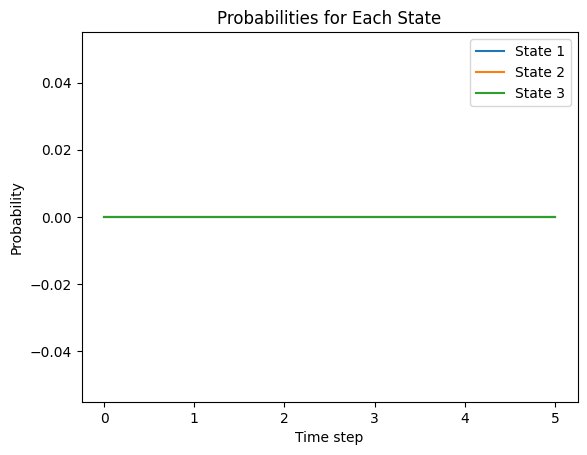

In [25]:
fb_probs = fb_alg(states, Transition, obs, q, Duration)

# plot each state
for state in states:
    probs = [fb_probs[t][state] for t in range(len(fb_probs))]
    plt.plot(probs, label=f'State {state}')

# label
plt.xlabel('Time step')
plt.ylabel('Probability')
plt.title('Probabilities for Each State')
plt.legend()
plt.show()